# Finding best location to open a Japanese restaurant in Dubai using machine learning technics and analysis of geospatial data.
### IBM Applied Data Science Capstone project - Dubai Neighborhood Analysis

by Giridhar Reddy Kolan

### 1 :  INTRODUCTION  <a name="introduction"></a>
-------------------------------------------------------

 **Dubai** is the largest and most populous city in the **United Arab Emirates**, located on the Eastern coast of the Arabian Peninsula. As per Dubai statistics center estimates of 2018, there are approximately 3.2 million residents from over 200 nationalities plus ever increasing tourists and traders on any given day. Dubai is one of the fastest-growing cities in the world, increasing at a rate of 10.7% annually. The beauty and tolerance of the city make it a prime choice for expatriates, and the growing economy and availability of jobs makes it an appealing place to settle. Due to its warm hospitality, rich cultural heritage, best in class infrastructure, tax-free income and a strategic location in the center of the major trading continents Dubai has fast become one of the world’s most popular tourist destinations and the best city to do business.


### 1.1 Business Problem
As the population of the Dubai city is growing rapidly with influx of working professionals and locals from just 1.3 million in 2005 to approximately 3.2 million in 2018 and inflow of tourists is ever increasing, which will be amplified with the approaching World Expo 2020, there is best opportunity for all prospective investors to venture into **Food and Beverage (F&B)** industry.

Upon quick checking of the Dubai Food and Beverage statistics data, it was observed that there is huge potential for **Japanese restaurants** serving authentic Japanese **Sushi Sashimi** and other healthy food options.

### 1.2 Objective: 
**The main objective of this project to use machine learning technics such as K-Means Clustering on geospatial / location data from Foursquare API and other sources to find out best location for opening new Japanese restaurants.**

### 2. DATA  <a name="data"></a>
-----------------------------------------------------------

### 2.1: Data sources 

Based on our business problem statement we will need following parameters data:
1.	**Tourists footfall:** What are top destinations of tourists in Dubai city with locations
2.	**Population density:** Dubai neighborhoods and population counts / Densities
3.	**Number of Venues** in the neighborhood to understand the commercial traffic
4.	**Existing restaurants** and their types around each neighborhood
5.	**Availability of competition** (existing Japanese restaurants) in the neighborhoods

We can collect the first two datasets from the following sources: 

**Top Tourist Destinations in Dubai City:**
 
•	https://www.globalmediainsight.com/blog/dubai-tourism-statistics/

•	https://www.planetware.com/tourist-attractions-/dubai-uae-dub-dubai.htm


**Number of Estimated Population in Dubai City:**

•	https://www.dsc.gov.ae/en-us/Themes/Pages/Population-and-Vital-Statistics.aspx?Theme=42

*This link contains data about the population size of the Dubai according to the population censuses conducted during the period 1975–2005 along with population estimates from 2006 to 2018. Moreover, it includes data on the age and household type structure of the population besides the demographic, educational, marital and employment characteristics during the censuses conducted in (1993, 2000 and 2005) and its associated estimates. Additionally, it also contains the main characteristics of the emirate's households during the mentioned census years.*


### 3. METHODOLOGY:

Choosing a **good location** for **restaurant business** is the single most effective thing for its success. Having a good menu and professional staff is important to restaurant success, but having a good location will give your business another push toward success. While choosing a location on low commercial traffic areas might save you on rent, it won’t allow your business much visibility. Setting up the restaurant in area with a lot of **commercial activities and foot traffic**  puts your restaurant business out to a lot more people and offers you the opportunity to flourish.

Therefore, to achieve our objective of finding the best site for a **new Japanese restaurant** we will follow below **step by step methodology**.

1.	Collect **top tourist destinations dataset** from respective web links / pages and create an excel file of these places. Update the tourist destinations file for missing values, such as **Latitude and Longitude values**, collected manually from **google earth.**

2.	Collect and clean 2018 Population data of Dubai from the **Dubai Statistics Center** website as an excel sheet.

3.	Collect Dubai sectors and community **shape file** from Open sources and clean the geometries.

4.	Join the 2018 community level population data excel sheet with Dubai shape file and calculate **population density** per square kilometer per community based on the total population and geographic extent of the community.

5.	**Explore and understand** the population distribution of Dubai neighborhoods.

6.	Collect **venues** data from **FOURSQUARE API** for tourist destination locations to understand commercial activity traffic around those locations.

7.	**Spatially Compare** tourist destination locations with the population data and venues data to understand which locations are inside the high population density and in highly commercial activity traffic areas.

8.	**Eliminate**  tourist destinations which are located in very low population density with very low commercial activity traffic (venue counts) from further analysis.

9.	Collect **existing Japanese restaurants** counts around shortlisted tourist destinations from using FOURSQUARE API to understand the ***competition***.

10.	Perform **k-means cluster analysis** on venues by tourist locations to identify suitable neighborhood / location for opening new Japanese restaurant.





### 4. Data Exploration:


Above datasets will be collected, cleaned and transformed into suitable format for further data exploration analysis. The sites with high tourist’s footfall (top tourist destinations) will be mapped by collecting their latitude and longitude values. Once we have the locations of these sites, we will spatially check them against population density and number of venues data to understand population density and commercial activity traffic around each site. If any destinations are falling in very low population density with very low commercial activity traffic (venue counts), then those destinations will be omitted from further analysis as they do not represent prospective sites for new restaurant. The final shortlisted sites will be used in machine learning algorithms such as K-means clustering to understand the overall restaurants distribution and in particular the Japanese restaurants. The top tourist’s destination sites with high population density, high commercial activity traffic and with low Japanese restaurants distributions will be selected as best location to open a Japanese restaurant in Dubai.

### 5.Conclusion

This concludes our analysis study of finding best location to open a Japanese restaurant in Dubai using machine learning techniques and analysis of geo-spatial data. By using a combination of different datasets of Dubai city from DSC, Foursquare API and other sources we were able to analyze, discover and describe tourist destinations neighborhoods with their population density statistically describe commercial activities (venue counts) and understand the existing competition by measuring the existing restaurants availability. 

Through this study we have identified 2 prospective locations, 1. Dubai Mall and 2. SKI Dubai for opening new Japanese restaurant. These areas have low number of restaurants and no Japanese restaurants nearby, and are located within the high population density areas. These locations are very popular with tourists, fairly close to city center and well connected by public transport. 

These final locations need be considered only as a starting point for exploring area neighborhoods in search for exact restaurant sites / vacant places / plots based on the investor investment risk profile. 

Finally, we are able to use learned data science knowledge, Database models, Visualization techniques, python tools and IBM applications to successfully complete the project.

## Working NoteBook 
---------------------------------


### Import all required libraries

In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
from pandas.io.json import json_normalize # tranforming json file into a pandas dataframe library
!pip install folium==0.5.0
import folium # Map plotting library
import math # for math functions
import json # library to handle JSON files
import xml
# from bs4 import BeautifulSoup
from sklearn.cluster import KMeans
import seaborn as sns
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt

##### Top tourist destinations of Dubai have been copied from from listed web pages and created a csv file. Latitude and Longitude values of each destination is collected manually from google earth. The resultent csv file is uploaded to IBM waston.
   Let us read the loaded Dubai_top_tourist_destinations.CSV file into a pandas dataframe

In [2]:
df_top_destins = pd.read_csv('Dubai_top_tourist_destinations.csv')
df_top_destins.head(10)

,Sno,Destination,Longitude,Latitude
0,1,Burj Khalifa,55.274376,25.197242
1,2,Dubai Mall,55.279440,25.198540
2,3,Mircale Garden,55.244704,25.059860
3,4,Dubai Museum,55.297246,25.263557
4,5,Burj Al Arab,55.185343,25.141303
5,6,Global Village,55.305683,25.068157
6,7,Atlantis,55.116978,25.130439
7,8,SKI Dubai,55.198304,25.117329
8,9,IMG world,55.318116,25.082081
9,10,Al Fahidi Historic District,55.299905,25.264324


In [3]:
df_top_destins.shape

(14, 4)

####  Similalrly Dubai Population 2018 is data is collected, cleaned , joined with the cumminity shape file to get each community areas in square Kilometers and same is uploaded to IBM Waston project

Let us read the loaded Dubai_Population_2018.CSV file into a pandas dataframe

In [4]:
df_pop_2018 = pd.read_csv('Dubai_Population_2018.csv')
df_pop_2018.head(10)

,Sno,Sector,CommunityName,Tot_pop_2018,Area_SqKM
0,1,Sector 1,AYAL NASIR,18925,0.2126
1,2,Sector 1,AL MURAR,38294,0.4762
2,3,Sector 1,AL DHAGAYA,15453,0.2176
3,4,Sector 1,NAIF,48804,0.9177
4,5,Sector 3,AL SUQ AL KABEER,46929,1.0744
5,6,Sector 1,AL SABKHA,3861,0.0898
6,7,Sector 1,HOR AL ANZ,81741,2.1501
7,8,Sector 1,AL MURQABAT,68717,1.8487
8,9,Sector 3,AL HAMRIYA,33421,1.0165
9,10,Sector 1,AL MUTEENA,43473,1.3670


#### Let us now explore the population data of Dubai by using pandas tools. 


In [5]:
df_pop_2018.describe()

,Sno,Tot_pop_2018,Area_SqKM
count,226.000000,226.000000,226.000000
mean,113.500000,14125.110619,24.112101
std,65.384759,24297.850367,40.936536
min,1.000000,0.000000,0.089800
25%,57.250000,419.250000,2.903325
50%,113.500000,5860.500000,7.592450
75%,169.750000,16723.500000,22.650825
max,226.000000,197838.000000,253.107300


In [7]:
df_pop_2018_plot = df_pop_2018[['Tot_pop_2018']]      # plot(kind='hist', figsize=(8, 5))

Text(0.5, 0, 'Number of people')

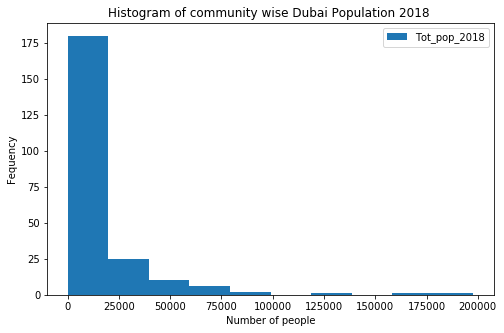

In [8]:
df_pop_2018_plot.plot(kind='hist', figsize=(8, 5))
plt.title('Histogram of community wise Dubai Population 2018 ') # add a title to the histogram
plt.ylabel('Fequency')
plt.xlabel('Number of people')

#### Let us find the Community with highest Total population

In [9]:
df_pop_2018.loc[df_pop_2018['Tot_pop_2018'].idxmax()]

Sno                              11
Sector                     Sector 2
CommunityName    MUHAISANAH SECOND 
Tot_pop_2018                 197838
Area_SqKM                     6.849
Name: 10, dtype: object

#### similalrly let us find the Community with highest Area in Square Kilometers

In [10]:
df_pop_2018.loc[df_pop_2018['Area_SqKM'].idxmax()]

Sno                    191
Sector            Sector 9
CommunityName    AL FAGAA'
Tot_pop_2018           395
Area_SqKM          253.107
Name: 190, dtype: object

We can clearly see that, the community with highest area do not have highest population.
Let us see is there any correlation between the total population and Area of the community.

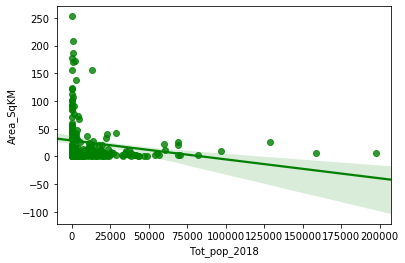

In [11]:
ax = sns.regplot(x='Tot_pop_2018', y='Area_SqKM', data=df_pop_2018, color='green')

We can clearly observe that, there is no correlation between the total population and areas of community. It is not always bigger areas have more population. Population generally concentrated around the old and new city centers.

Population distribution of the city can be better understood by the population density of each community than the total population. 
Let us calculate the population density from these two columns data : 

population density = total population / area of community

In [12]:
df_pop_2018['pop_densty'] = df_pop_2018['Tot_pop_2018']/ df_pop_2018['Area_SqKM']
df_pop_2018.pop_densty = df_pop_2018.pop_densty.round(decimals=0)
df_pop_2018.head(10)

,Sno,Sector,CommunityName,Tot_pop_2018,Area_SqKM,pop_densty
0,1,Sector 1,AYAL NASIR,18925,0.2126,89017.0
1,2,Sector 1,AL MURAR,38294,0.4762,80416.0
2,3,Sector 1,AL DHAGAYA,15453,0.2176,71016.0
3,4,Sector 1,NAIF,48804,0.9177,53181.0
4,5,Sector 3,AL SUQ AL KABEER,46929,1.0744,43679.0
5,6,Sector 1,AL SABKHA,3861,0.0898,42996.0
6,7,Sector 1,HOR AL ANZ,81741,2.1501,38017.0
7,8,Sector 1,AL MURQABAT,68717,1.8487,37170.0
8,9,Sector 3,AL HAMRIYA,33421,1.0165,32879.0
9,10,Sector 1,AL MUTEENA,43473,1.3670,31802.0


In [13]:
df_dxb_heatmap = df_pop_2018[['CommunityName', 'pop_densty']]
df_dxb_heatmap.head()

,CommunityName,pop_densty
0,AYAL NASIR,89017.0
1,AL MURAR,80416.0
2,AL DHAGAYA,71016.0
3,NAIF,53181.0
4,AL SUQ AL KABEER,43679.0


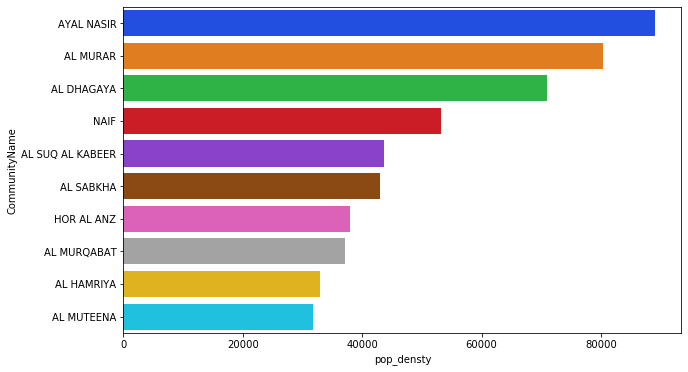

In [14]:
df_dxb_heatmap_top10 = df_dxb_heatmap.nlargest(10, 'pop_densty')
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="pop_densty", y="CommunityName", data=df_dxb_heatmap_top10, palette="bright")

Let us now plot these density data with the help folium and collected Dubai shape file.
Dubai city shape file been exported as geojson file and uploaded to the project

In [15]:
dxb_geo = (open('Dubai_City_GCS.json').read())

Now that we have the Dubai GeoJSON file, let's create a Dubai map, centered around Dubai  latitude and longitude values (55.274376, 25.197242), with an initial zoom level of 11

In [16]:
threshold_scale = np.linspace(df_dxb_heatmap['pop_densty'].min(),
                              df_dxb_heatmap['pop_densty'].max(),
                              6, dtype=int)
threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1 # make sure that the last value of the list is greater than the maximum immigration
#print (threshold_scale)
dxb_map = folium.Map(location=[25.197242, 55.274376], zoom_start=11)
dxb_map.choropleth(
    #geo_data=world_geo,
    geo_data= dxb_geo,
    data=df_dxb_heatmap,
    columns=['CommunityName', 'pop_densty'],
    key_on='feature.properties.CommunityName',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    threshold_scale = threshold_scale,
    legend_name='Dubai population density',
    reset=True
)

# display map
dxb_map

Now let's superimpose the locations of top tourist destinations on this Dubai map.
The way to do that in **Folium** is to create a *feature group* with its own features and style and then add it to the dxb_map 

In [17]:
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()
folium.TileLayer('cartodbpositron').add_to(dxb_map)
# loop through the top tourist destinations datarame and add them to feature group
for lat, lng, label in zip(df_top_destins.Latitude, df_top_destins.Longitude , df_top_destins.Destination):
    incidents.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=6, # define how big you want the circle markers to be
            color='white',
            fill=True,
            popup=label,
            fill_color='black',
            fill_opacity=0.7
        )
    )

# add incidents to map
dxb_map.add_child(incidents)

We can clearly observe that the some of the top tourist destinations are very low population density areas. Let us not conclude any thing now, but let explore population density from above dataset and venues counts (commercial activity) around these locations using Fouresquare API

### Define Foursquare Credentials and Version

In [18]:
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
VERSION = '' # Foursquare API version
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)
LIMIT = 100

Your credentails:
CLIENT_ID: YO3YIEABUD5T1KI5I4GE2ZK2GKYMCHNLY3MJQHKPSZ0E0FPM
CLIENT_SECRET:ZWLGU1SL2M4LPULDSORP4CSIHYSZMNSPEWS2XVOTHSAFS2ZX


### Let us  to get all the  venues around 1000 meters from each tourist destinations

In [24]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [25]:
Dubai_venues = getNearbyVenues(names=df_top_destins['Destination'],
                                   latitudes=df_top_destins['Latitude'],
                                   longitudes=df_top_destins['Longitude']
                                  )


Burj Khalifa
Dubai Mall
Mircale Garden
Dubai Museum
Burj Al Arab
Global Village
Atlantis
SKI Dubai
IMG world
Al Fahidi Historic District
Jumeirah Beach
Gold Souq
Dubai Frame
Ras Al Khor Wildlife Sanctuary


### Let's check the size of the resulting dataframe

In [26]:
print(Dubai_venues.shape)
Dubai_venues.head()

(982, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Burj Khalifa,25.197242,55.274376,Fashion Avenue,25.198198,55.275885,Boutique
1,Burj Khalifa,25.197242,55.274376,Burj Khalifa (برج خليفة),25.197233,55.274148,Monument / Landmark
2,Burj Khalifa,25.197242,55.274376,Cartier (كارتييه),25.198577,55.274813,Jewelry Store
3,Burj Khalifa,25.197242,55.274376,Armani Hotel Dubai (فندق أرماني دبي),25.197379,55.274202,Hotel
4,Burj Khalifa,25.197242,55.274376,L’ETO,25.197224,55.276368,Café


### Let's check how many venues were returned for each neighborhood

In [27]:
Dubai_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Al Fahidi Historic District,100,100,100,100,100,100
Atlantis,56,56,56,56,56,56
Burj Al Arab,82,82,82,82,82,82
Burj Khalifa,100,100,100,100,100,100
Dubai Frame,100,100,100,100,100,100
Dubai Mall,100,100,100,100,100,100
Dubai Museum,100,100,100,100,100,100
Global Village,36,36,36,36,36,36
Gold Souq,89,89,89,89,89,89


#### Let's find out how many unique categories can be curated from all the returned venues

In [28]:
print('There are {} uniques categories.'.format(len(Dubai_venues['Venue Category'].unique())))

There are 168 uniques categories.


### Let us see the Dubai_venues data to find the least commercial activity locations

In [29]:
group_by_Neighborhood = Dubai_venues.groupby('Neighborhood', as_index=False).count()
group_by_Neighborhood

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Al Fahidi Historic District,100,100,100,100,100,100
1,Atlantis,56,56,56,56,56,56
2,Burj Al Arab,82,82,82,82,82,82
3,Burj Khalifa,100,100,100,100,100,100
4,Dubai Frame,100,100,100,100,100,100
5,Dubai Mall,100,100,100,100,100,100
6,Dubai Museum,100,100,100,100,100,100
7,Global Village,36,36,36,36,36,36
8,Gold Souq,89,89,89,89,89,89
9,IMG world,33,33,33,33,33,33


In [30]:
dxb_venues = group_by_Neighborhood[['Neighborhood', 'Venue']]
dxb_venues1 = dxb_venues.rename({'Neighborhood': 'Destination','Venue': 'Venue_count'}, axis='columns')
dxb_venues1.sort_values('Venue_count')

,Destination,Venue_count
11,Mircale Garden,5
12,Ras Al Khor Wildlife Sanctuary,6
9,IMG world,33
7,Global Village,36
1,Atlantis,56
10,Jumeirah Beach,75
2,Burj Al Arab,82
8,Gold Souq,89
0,Al Fahidi Historic District,100
3,Burj Khalifa,100


### Similarly, Let us find out the population density around these tourist destintions.

#### In-order to find in which communities these tourists destinations fall, we need to spatially join the two data sets. for this we will use geopandas package

In [54]:
!conda install -c conda-forge geopandas --yes
import geopandas as gpd

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.7.12

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - geopandas


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    graphviz-2.40.1            |       h21bd128_2         6.9 MB
    gdal-2.2.2                 |   py36hc209d97_1         767 KB
    geos-3.6.2                 |       heeff764_2         1.6 MB
    shapely-1.6.4              |py36h0c48222_1000         338 KB  conda-forge
    libnetcdf-4.6.1            |     h628ed10_200         1.3 MB  conda-forge
    kealib-1.4.9               |       h0bee7d0_2         174 KB  conda-forge
    libkml-1.3.0               |    h4fcabce_1010         643 KB  conda-forge
    matplotlib-

In [55]:
# convert tourists destinations to Geopandas Geodataframe
gdf_top_destins = gpd.GeoDataFrame(df_top_destins,   geometry=gpd.points_from_xy(df_top_destins.Longitude, df_top_destins.Latitude))
gdf_top_destins.crs = {'init' :'epsg:4326'}  # assignes geographic coordinate system - wgs84
gdf_top_destins.crs

{'init': 'epsg:4326'}

In [56]:
# get the Dubai City geojson file into geodataframe
#gdf_dxb_city = “Dubai_City_GCS.json”
gdf_dxb_city = gpd.read_file('Dubai_City_GCS.json')
gdf_dxb_city.crs

{'init': 'epsg:4326'}

In [34]:
gdf_top_destins

,Sno,Destination,Longitude,Latitude,geometry
0,1,Burj Khalifa,55.274376,25.197242,POINT (55.27438 25.19724)
1,2,Dubai Mall,55.279440,25.198540,POINT (55.27944 25.19854)
2,3,Mircale Garden,55.244704,25.059860,POINT (55.24470 25.05986)
3,4,Dubai Museum,55.297246,25.263557,POINT (55.29725 25.26356)
4,5,Burj Al Arab,55.185343,25.141303,POINT (55.18534 25.14130)
5,6,Global Village,55.305683,25.068157,POINT (55.30568 25.06816)
6,7,Atlantis,55.116978,25.130439,POINT (55.11698 25.13044)
7,8,SKI Dubai,55.198304,25.117329,POINT (55.19830 25.11733)
8,9,IMG world,55.318116,25.082081,POINT (55.31812 25.08208)
9,10,Al Fahidi Historic District,55.299905,25.264324,POINT (55.29991 25.26432)


In [35]:
gdf_dxb_city

,OBJECTID,COMM_NUM,Community_Code,Tot_pop_2018,Sector,CommunityName,Area_SqKM,Pop_Density_2018,Shape_Length,Shape_Area,geometry
0,1,646,646,2,Sector 6,WADI AL SAFA 4,8.391692,0.238331,0.119470,0.000613,"POLYGON ((55.33738 25.07955, 55.33510 25.08278..."
1,2,311,311,2,Sector 3,AL SHANDAGA,0.381717,5.239487,0.033759,0.000028,"POLYGON ((55.29056 25.26540, 55.29069 25.26551..."
2,3,394,394,23488,Sector 3,AL THANYAH FOURTH (EMIRATE HILLS THIRD),13.560263,1732.119806,0.143911,0.000991,"POLYGON ((55.18092 25.07789, 55.17919 25.07920..."
3,4,616,616,137,Sector 6,NAD AL SHIBBA THIRD,7.747413,17.683323,0.092040,0.000566,"POLYGON ((55.38248 25.13985, 55.38290 25.14078..."
4,5,116,116,18925,Sector 1,AYAL NASIR,0.212589,89021.712996,0.015910,0.000016,"POLYGON ((55.30345 25.27199, 55.30452 25.27249..."
...,...,...,...,...,...,...,...,...,...,...,...
130,144,363,363,7709,Sector 3,AL MANARA,2.689568,2866.259547,0.058296,0.000196,"POLYGON ((55.21438 25.13395, 55.21447 25.13411..."
131,145,346,346,19715,Sector 3,AL KALIJ AL TEJARI,8.077049,2440.866744,0.122573,0.000590,"POLYGON ((55.27748 25.18524, 55.27745 25.18527..."
132,146,302,302,39,Sector 3,JUMEIRA BAY,1.203261,32.411917,0.074931,0.000088,"POLYGON ((55.23108 25.22339, 55.23106 25.22339..."
133,147,304,304,3,Sector 3,JUMEIRA ISLAND 2,0.143120,20.961440,0.017097,0.000010,"POLYGON ((55.22659 25.20065, 55.22657 25.20065..."


#### Spatial Join
Let us use the spatial join to determine which tourist point is within each community area there by we can get its population density.

In [24]:
# !pip install rtree
# !pip install libspatialindex==1.9.3

In [81]:
gdf_top_destins.crs = {'init' :'epsg:4326'}
print (gdf_top_destins.crs)
print(gdf_dxb_city.crs)

{'init': 'epsg:4326'}
{'init': 'epsg:4326'}


In [88]:
sjoin_tourist_pts = gpd.sjoin(gdf_top_destins, gdf_dxb_city, how="inner", op='intersects')

In [33]:
sjoin_tourist_pts.head()

,OBJECTID,Sno,Destination,Longitude,Latitude,COMM_NUM,Community_Code,Tot_pop_2018,Sector,CommunityName,Area_SqKM,Pop_Density_2018
0,1,1,Burj Khalifa,55.274376,25.197242,345,345,18698,Sector 3,BURJ KHALIFA,3.262775,5730.704059
1,2,2,Dubai Mall,55.279440,25.198540,345,345,18698,Sector 3,BURJ KHALIFA,3.262775,5730.704059
2,3,3,Mircale Garden,55.244704,25.059860,673,673,4566,Sector 6,AL BARSHA SOUTH THIRD,4.581933,996.522624
3,4,4,Dubai Museum,55.297246,25.263557,312,312,46929,Sector 3,AL SUQ AL KABEER,1.074399,43679.287034
4,5,5,Burj Al Arab,55.185343,25.141303,366,366,7021,Sector 3,UM SUQAIM THIRD,3.112740,2255.568922


Let us now join this table with the venues count table to understand which locations are inside the high population density and in highly commercial activity traffic areas

In [34]:
df_merged = pd.merge(sjoin_tourist_pts, dxb_venues1, on='Destination')
df_merged.head()

,OBJECTID,Sno,Destination,Longitude,Latitude,COMM_NUM,Community_Code,Tot_pop_2018,Sector,CommunityName,Area_SqKM,Pop_Density_2018,Venue_count
0,1,1,Burj Khalifa,55.274376,25.197242,345,345,18698,Sector 3,BURJ KHALIFA,3.262775,5730.704059,100
1,2,2,Dubai Mall,55.279440,25.198540,345,345,18698,Sector 3,BURJ KHALIFA,3.262775,5730.704059,100
2,3,3,Mircale Garden,55.244704,25.059860,673,673,4566,Sector 6,AL BARSHA SOUTH THIRD,4.581933,996.522624,5
3,4,4,Dubai Museum,55.297246,25.263557,312,312,46929,Sector 3,AL SUQ AL KABEER,1.074399,43679.287034,100
4,5,5,Burj Al Arab,55.185343,25.141303,366,366,7021,Sector 3,UM SUQAIM THIRD,3.112740,2255.568922,82


### Let us eliminate tourist destinations which are located in very low population density with  low commercial activity traffic (venue counts) from further analysis

For this study, based on stakeholders and experts opinions we will ignore all destinations with less than 700 people per Square Kilometer or Venues count is less than 70 with in 1Km range

In [35]:
df_shortlist1 = df_merged.loc[(df_merged.Pop_Density_2018 > 700 ) & (df_merged.Venue_count > 70)]
print(df_shortlist1.shape)
df_shortlist1.head()

(8, 13)


,OBJECTID,Sno,Destination,Longitude,Latitude,COMM_NUM,Community_Code,Tot_pop_2018,Sector,CommunityName,Area_SqKM,Pop_Density_2018,Venue_count
0,1,1,Burj Khalifa,55.274376,25.197242,345,345,18698,Sector 3,BURJ KHALIFA,3.262775,5730.704059,100
1,2,2,Dubai Mall,55.279440,25.198540,345,345,18698,Sector 3,BURJ KHALIFA,3.262775,5730.704059,100
3,4,4,Dubai Museum,55.297246,25.263557,312,312,46929,Sector 3,AL SUQ AL KABEER,1.074399,43679.287034,100
4,5,5,Burj Al Arab,55.185343,25.141303,366,366,7021,Sector 3,UM SUQAIM THIRD,3.112740,2255.568922,82
7,8,8,SKI Dubai,55.198304,25.117329,373,373,35469,Sector 3,AL BARSHAA FIRST,4.843567,7322.909633,100


In [36]:
df_shortlist1[['Destination','CommunityName','Pop_Density_2018','Venue_count']]

,Destination,CommunityName,Pop_Density_2018,Venue_count
0,Burj Khalifa,BURJ KHALIFA,5730.704059,100
1,Dubai Mall,BURJ KHALIFA,5730.704059,100
3,Dubai Museum,AL SUQ AL KABEER,43679.287034,100
4,Burj Al Arab,UM SUQAIM THIRD,2255.568922,82
7,SKI Dubai,AL BARSHAA FIRST,7322.909633,100
9,Al Fahidi Historic District,AL SUQ AL KABEER,43679.287034,100
10,Jumeirah Beach,UM SUQAIM SECOND,3353.225474,75
11,Gold Souq,AL RASS,19781.519420,89


These are our shortlisted locations for further analysis.
### We need to understand the competition around these locations by finding the count of existing all types of restaurants in general and Japanese restaurants in particular.

In [37]:
df_restaurant = Dubai_venues[Dubai_venues['Venue Category'].str.contains('Restaurant')]
df_jap_restrnt = Dubai_venues[Dubai_venues['Venue Category'].str.contains('Japanese Restaurant')]

In [38]:
print(Dubai_venues.shape)
print(df_restaurant.shape)
print(df_jap_restrnt.shape)

(982, 7)
(289, 7)
(6, 7)


In [39]:
df_restaurant_grpby = Dubai_venues[Dubai_venues['Venue Category'].str.contains('Restaurant')].groupby('Neighborhood', as_index=False)['Venue Category'].count()
df_jap_restrnt_grpby = Dubai_venues[Dubai_venues['Venue Category'].str.contains('Japanese Restaurant')].groupby('Neighborhood', as_index=False)['Venue Category'].count()

In [40]:
df_restaurant_grpby.rename({'Neighborhood': 'Destination','Venue Category': 'restaurant_count'}, axis='columns', inplace=True)
df_jap_restrnt_grpby.rename({'Neighborhood': 'Destination','Venue Category': 'japan_restaurant_count'}, axis='columns', inplace=True)

In [41]:
print(df_restaurant_grpby.shape)
df_restaurant_grpby.head()

(13, 2)


,Destination,restaurant_count
0,Al Fahidi Historic District,42
1,Atlantis,14
2,Burj Al Arab,27
3,Burj Khalifa,24
4,Dubai Frame,54


In [42]:
print(df_jap_restrnt_grpby.shape)
df_jap_restrnt_grpby.head()

(4, 2)


,Destination,japan_restaurant_count
0,Atlantis,1
1,Burj Al Arab,1
2,Burj Khalifa,3
3,Dubai Frame,1


### Let us merege these two datasets with the our shortlisted tourist destination locations 
to understand full picture of population density, total venues, number of restaurants and number of Japanese restaurants

In [43]:
df_shortlist2 = pd.merge(df_shortlist1, df_restaurant_grpby, how ='left', on='Destination')

In [44]:
df_shortlist3 = pd.merge(df_shortlist2, df_jap_restrnt_grpby, how ='left', on='Destination')

In [45]:
df_shortlist3.head()

,OBJECTID,Sno,Destination,Longitude,Latitude,COMM_NUM,Community_Code,Tot_pop_2018,Sector,CommunityName,Area_SqKM,Pop_Density_2018,Venue_count,restaurant_count,japan_restaurant_count
0,1,1,Burj Khalifa,55.274376,25.197242,345,345,18698,Sector 3,BURJ KHALIFA,3.262775,5730.704059,100,24,3.0
1,2,2,Dubai Mall,55.279440,25.198540,345,345,18698,Sector 3,BURJ KHALIFA,3.262775,5730.704059,100,11,NaN
2,4,4,Dubai Museum,55.297246,25.263557,312,312,46929,Sector 3,AL SUQ AL KABEER,1.074399,43679.287034,100,35,NaN
3,5,5,Burj Al Arab,55.185343,25.141303,366,366,7021,Sector 3,UM SUQAIM THIRD,3.112740,2255.568922,82,27,1.0
4,8,8,SKI Dubai,55.198304,25.117329,373,373,35469,Sector 3,AL BARSHAA FIRST,4.843567,7322.909633,100,21,NaN


### Now let us fill the **NaN** values in Japanese restaurants column with zeros

In [46]:
df_shortlist3['japan_restaurant_count'] = df_shortlist3['japan_restaurant_count'].fillna(0)

In [47]:
df_shortlist3.head()

,OBJECTID,Sno,Destination,Longitude,Latitude,COMM_NUM,Community_Code,Tot_pop_2018,Sector,CommunityName,Area_SqKM,Pop_Density_2018,Venue_count,restaurant_count,japan_restaurant_count
0,1,1,Burj Khalifa,55.274376,25.197242,345,345,18698,Sector 3,BURJ KHALIFA,3.262775,5730.704059,100,24,3.0
1,2,2,Dubai Mall,55.279440,25.198540,345,345,18698,Sector 3,BURJ KHALIFA,3.262775,5730.704059,100,11,0.0
2,4,4,Dubai Museum,55.297246,25.263557,312,312,46929,Sector 3,AL SUQ AL KABEER,1.074399,43679.287034,100,35,0.0
3,5,5,Burj Al Arab,55.185343,25.141303,366,366,7021,Sector 3,UM SUQAIM THIRD,3.112740,2255.568922,82,27,1.0
4,8,8,SKI Dubai,55.198304,25.117329,373,373,35469,Sector 3,AL BARSHAA FIRST,4.843567,7322.909633,100,21,0.0


### Now lets select only the locations that do not have any Japanese restaurants

In [48]:
df_shortlist4 = df_shortlist3[df_shortlist3.japan_restaurant_count < 1]
print(df_shortlist4.shape)
df_shortlist4[['Destination','CommunityName','Pop_Density_2018','Venue_count', 'restaurant_count', 'japan_restaurant_count' ]]

(6, 15)


,Destination,CommunityName,Pop_Density_2018,Venue_count,restaurant_count,japan_restaurant_count
1,Dubai Mall,BURJ KHALIFA,5730.704059,100,11,0.0
2,Dubai Museum,AL SUQ AL KABEER,43679.287034,100,35,0.0
4,SKI Dubai,AL BARSHAA FIRST,7322.909633,100,21,0.0
5,Al Fahidi Historic District,AL SUQ AL KABEER,43679.287034,100,42,0.0
6,Jumeirah Beach,UM SUQAIM SECOND,3353.225474,75,21,0.0
7,Gold Souq,AL RASS,19781.519420,89,28,0.0


Looks good, we have 6 locations that are shortlisted so far. 

### let us display all of the following data on our map using the folium
1- Restaurants
2- Japan restaurants
3- Shortlisted locations for clustering


In [49]:
restaurant_latlons = [[lat, lng] for lat, lng in zip(df_restaurant['Venue Latitude'], df_restaurant['Venue Longitude'])]

### All types Restaurants Heat Map around the top tourist destinations

In [50]:
dxb_map = folium.Map(location=[25.197242, 55.274376], zoom_start=11)
from folium import plugins
from folium.plugins import HeatMap
folium.TileLayer('cartodbpositron').add_to(dxb_map) #cartodbpositron cartodbdark_matter
HeatMap(restaurant_latlons).add_to(dxb_map)
dxb_map.add_child(incidents)
dxb_map

In [51]:
jap_restrnt_latlons = [[lat, lng] for lat, lng in zip(df_jap_restrnt['Venue Latitude'], df_jap_restrnt['Venue Longitude'])]

### Japanese Restaurants Heat Map around the top tourist destinations

In [52]:
dxb_map = folium.Map(location=[25.197242, 55.274376], zoom_start=11)
from folium import plugins
from folium.plugins import HeatMap
folium.TileLayer('cartodbpositron').add_to(dxb_map) #cartodbpositron cartodbdark_matter
HeatMap(jap_restrnt_latlons).add_to(dxb_map)
dxb_map.add_child(incidents)
dxb_map

### Shortlisted tourist destinations

In [53]:
HeatMap(restaurant_latlons, radius = 22).add_to(dxb_map)

dxb_map.choropleth(
    #geo_data=world_geo,
    geo_data= dxb_geo,
    data=df_dxb_heatmap,
    columns=['CommunityName', 'pop_densty'],
    key_on='feature.properties.CommunityName',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    threshold_scale = threshold_scale,
    legend_name='Dubai population density',
    reset=True
)


# instantiate a feature group for the incidents in the dataframe
shortlist_incidents = folium.map.FeatureGroup()
for lat, lng, label in zip(df_shortlist4.Latitude, df_shortlist4.Longitude , df_shortlist4.Destination):
    shortlist_incidents.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=9, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            popup=label,
            fill_color='green',
            fill_opacity=0.8
        )
    )

# add incidents to map
dxb_map.add_child(shortlist_incidents)

#### Looking good. What we have now are shortlisted locations within high population density and with no Japanese restaurants nearby.

Let us now cluster those locations to create centers of communities containing good locations. Those communities with their centers  will be the final result of our analysis.

In [54]:
Dxb_center = [25.197242, 55.274376]
poi_latlons = [[lat, lng] for lat, lng in zip(df_top_destins['Latitude'], df_top_destins['Longitude'])]

from sklearn.cluster import KMeans
number_of_clusters = 3

good_xys = [[lat, lng] for lat, lng in zip(df_shortlist4['Latitude'], df_shortlist4['Longitude'])]
kmeans = KMeans(n_clusters=number_of_clusters, random_state=0).fit(good_xys)
cluster_centers = kmeans.cluster_centers_  

dxb_map1 = folium.Map(location=Dxb_center, zoom_start=11)
folium.TileLayer('cartodbpositron').add_to(dxb_map1)
HeatMap(restaurant_latlons, radius = 22).add_to(dxb_map1)
# HeatMap(jap_restrnt_latlons, radius = 22).add_to(dxb_map1)

for lat, lon in poi_latlons:
    folium.Circle([lat, lon], radius=200, color='red', fill=True, fill_opacity=0.4).add_to(dxb_map1)

for lat, lon in cluster_centers:    
    folium.Circle([lat, lon], radius=1000, color='green', fill=True, fill_opacity=0.3).add_to(dxb_map1) 
    
for lat, lon in zip(df_shortlist4.Latitude, df_shortlist4.Longitude):
    folium.CircleMarker([lat, lon], radius=9, color='white', fill=True, fill_color='green', fill_opacity=0.6).add_to(dxb_map1)
    
#folium.GeoJson(berlin_boroughs, style_function=boroughs_style, name='geojson').add_to(map_berlin)
dxb_map1

In [95]:
dxb_map1.save('dxb_map1.html')

### Now we have map showing the shortlisted locations (white rings) along with their cluster centers (green rings) and eliminated locations (red rings). 
We can  observe on the map that, clusters  near **SKI Dubai** and **Dubai mall** have less competitions compared with cluster near **Dubai museum**. 

### Let us confirm this by calculating the ratio of restaurants to total number of venues around these shortlisted locations

In [62]:
df_shortlist4['restaurantratio'] = df_shortlist4.restaurant_count / df_shortlist4.Venue_count
df_shortlist4.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,OBJECTID,Sno,Destination,Longitude,Latitude,COMM_NUM,Community_Code,Tot_pop_2018,Sector,CommunityName,Area_SqKM,Pop_Density_2018,Venue_count,restaurant_count,japan_restaurant_count,restaurantratio
1,2,2,Dubai Mall,55.279440,25.198540,345,345,18698,Sector 3,BURJ KHALIFA,3.262775,5730.704059,100,11,0.0,0.11
2,4,4,Dubai Museum,55.297246,25.263557,312,312,46929,Sector 3,AL SUQ AL KABEER,1.074399,43679.287034,100,35,0.0,0.35
4,8,8,SKI Dubai,55.198304,25.117329,373,373,35469,Sector 3,AL BARSHAA FIRST,4.843567,7322.909633,100,21,0.0,0.21
5,10,10,Al Fahidi Historic District,55.299905,25.264324,312,312,46929,Sector 3,AL SUQ AL KABEER,1.074399,43679.287034,100,42,0.0,0.42
6,11,11,Jumeirah Beach,55.194412,25.148510,362,362,11456,Sector 3,UM SUQAIM SECOND,3.416412,3353.225474,75,21,0.0,0.28


In [58]:
final_locations = df_shortlist4.sort_values('restaurantratio')
final_locations[['Destination', 'restaurantratio']]

,Destination,restaurantratio
1,Dubai Mall,0.110000
4,SKI Dubai,0.210000
6,Jumeirah Beach,0.280000
7,Gold Souq,0.314607
2,Dubai Museum,0.350000
5,Al Fahidi Historic District,0.420000


### Now we can clearly see that, **Dubai mall** and **SKI Dubai** have least competition compared with other locations.

In [59]:
final_locations_grph = final_locations[['Destination', 'Venue_count', 'restaurantratio' ]]
final_locations_grph.set_index('Destination', inplace=True)
final_locations_grph.restaurantratio= final_locations_grph.restaurantratio*100
final_locations_grph.restaurantratio = final_locations_grph.restaurantratio.round(decimals=2)
final_locations_grph

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,Venue_count,restaurantratio
Destination,,
Dubai Mall,100,11.00
SKI Dubai,100,21.00
Jumeirah Beach,75,28.00
Gold Souq,89,31.46
Dubai Museum,100,35.00
Al Fahidi Historic District,100,42.00


In [60]:
cols = [ 'Venue_count', 'restaurantratio']

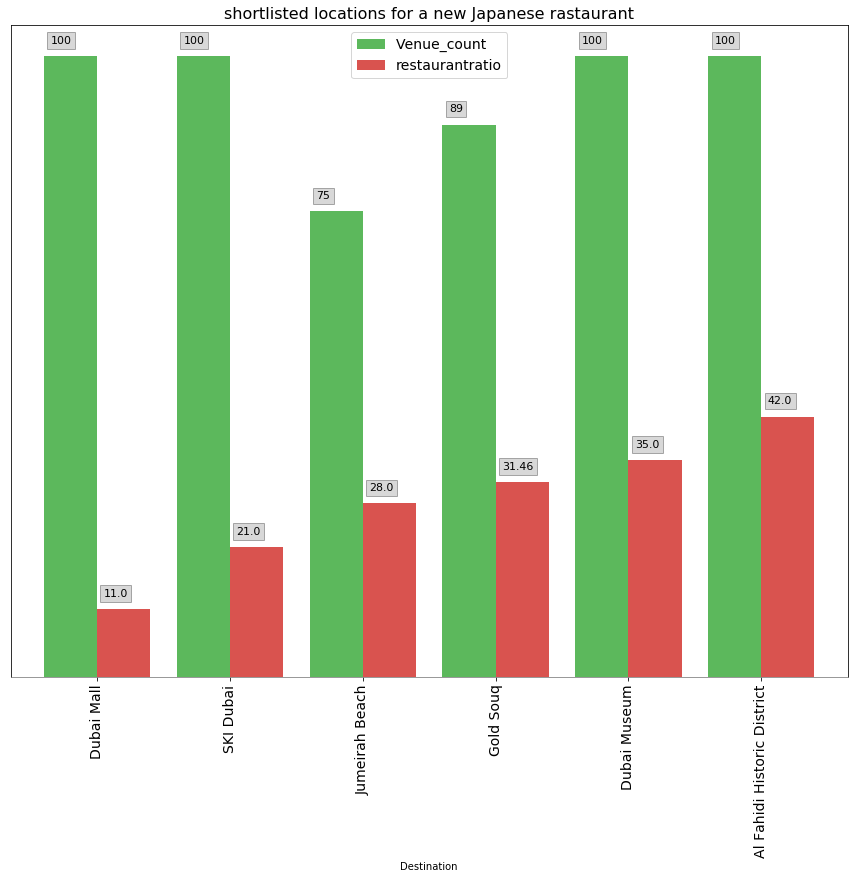

In [61]:
ax1 = final_locations_grph.plot(kind='bar', alpha=1, figsize=(15, 12), color=['#5cb85c', '#d9534f'], width=0.8, fontsize =14)
ax1.set_title('shortlisted locations for a new Japanese rastaurant', fontsize=16)
ax1.patch.set_facecolor('w')
ax1.legend(cols, fontsize=14)
ax1.axes.get_yaxis().set_visible(False)
ax1.axes.get_xaxis().set_visible(True)
ax1.spines['bottom'].set_color('gray')
for p in ax1.patches:
    ax1.annotate(str(p.get_height()), (p.get_x()+.05, p.get_height()+2), size=11, bbox=dict(boxstyle='square,pad=0.3', fc='gray', alpha=0.3) )

This concludes our analysis. We have identified 2 prospective locations, **1. Dubai Mall and 2. SKI Dubai** for opening **new Japanese restaurant.** These areas have low number of restaurants and no Japanese restaurants nearby, and are falling with in the **high population density areas.** These locations are **very popular with tourists, fairly close to city center and well connected by public transport**. They need be considered only as a starting point for exploring area neighborhoods in search for exact restaurant sites / plots.

In [94]:
ax1.figure.savefig('final_bar.png')